#### In this homework you will do experiments with linear SVMs and feature selection. 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_curve, auc, precision_score
from sklearn.svm import LinearSVC
from sklearn import preprocessing
%matplotlib inline

##### Spam data: Splitting and scaling

In [20]:
spam_data = pd.read_csv("spambase.data")
X = spam_data.iloc[:,:-1]
y = spam_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_scaled = scaler.transform(X_test)

#### Experiment 1

In [21]:
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)

print(f"Accuracy: {clf.score(X_test_scaled, y_test)}")
print(f"Precision: {precision_score(y_test,clf.predict(X_test_scaled))}")
print(f"Recall: {recall_score(y_test,clf.predict(X_test_scaled))}")

Accuracy: 0.9269565217391305
Precision: 0.9266895761741123
Recall: 0.8860898138006572


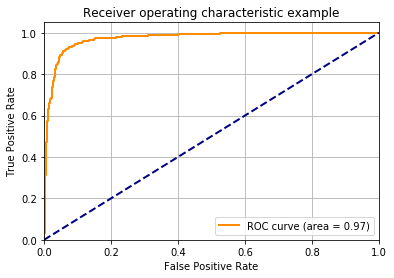

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, clf.fit(X_train_scaled, y_train).decision_function(X_test_scaled))
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Experiment 2

In [23]:
weights = np.reshape(clf.coef_, (57,))
L = [ (weights[i],i) for i in range(len(weights)) ]
L.sort(reverse=True)
weights_sorted,index = zip(*L)

X = spam_data.iloc[:,:-1]

m_list = []
a_list = []
features = []
features.append(weights_sorted[0])
print(index)
for i in range(1, len(index)):
    m_list.append(i+1)
    features.append(index[i])
    X_m = spam_data.iloc[:, lambda spam_data: features]
    X_train, X_test, y_train, y_test = train_test_split(X_m, y, test_size=0.5)
    X_train_scaled = preprocessing.scale(X_train)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = LinearSVC()
    clf.fit(X_train_scaled, y_train)
    a_list.append(clf.score(X_test_scaled, y_test))

(3, 31, 52, 55, 22, 6, 15, 23, 14, 27, 53, 16, 56, 8, 4, 21, 51, 35, 17, 5, 20, 19, 13, 7, 18, 10, 2, 9, 49, 50, 30, 39, 37, 29, 1, 0, 46, 12, 38, 36, 11, 32, 48, 42, 44, 28, 43, 47, 54, 45, 34, 41, 33, 25, 24, 40, 26)


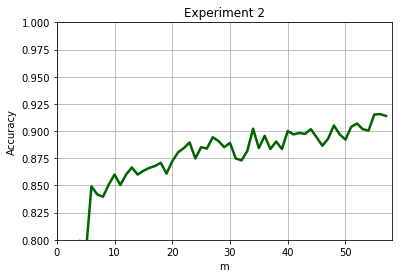

In [24]:
plt.figure()
plt.plot(m_list, a_list, color='darkgreen',
         lw=2.5)
plt.xlim([0.0, 58])
plt.ylim([0.8, 1])
plt.xlabel('m')
plt.ylabel('Accuracy')
plt.title('Experiment 2')
plt.grid(True)
plt.show()

##### Experiment 3

In [28]:
e3_a_list = []

for i in range(2, 58):
    features = np.random.uniform(0,57,i)
    X_m = spam_data.iloc[:, lambda spam_data: list(features)]
    X_train, X_test, y_train, y_test = train_test_split(X_m, y, test_size=0.5)
    X_train_scaled = preprocessing.scale(X_train)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = LinearSVC()
    clf.fit(X_train_scaled, y_train)
    e3_a_list.append(clf.score(X_test_scaled, y_test))
    

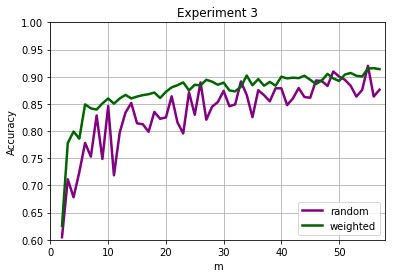

In [35]:
plt.figure()
plt.plot(m_list, e3_a_list, color='purple',
         lw=2.5,label="random")
plt.plot(m_list, a_list, color='darkgreen',
         lw=2.5, label="weighted")
plt.xlim([0.0, 58])
plt.ylim([0.6, 1])
plt.xlabel('m')
plt.ylabel('Accuracy')
plt.title('Experiment 3')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()